In [199]:
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import MinMaxScaler


#Insert your local repo path to file
csv_500 = "D:\Archivos\Social Data Challenge\data\grids\grid_500.csv"
csv_100 = "D:\Archivos\Social Data Challenge\data\grids\grid_100.csv"


In [200]:
# Load your dataset
df_100 = pd.read_csv(csv_100)
df_500 = pd.read_csv(csv_500)


x = df_500.iloc[:,:-1].values
x1 = df_500.iloc[:,:-1]
y = df_500.iloc[:, -1].values
y1 = df_500.iloc[:, -1]

In [201]:
x1

,id,lat,lon,metro_500,cams_500,zonas_pat,antro_500,salud_500,museo_500,esc_500,...,g500_20q3,g500_20q4,g500_21q1,g500_21q2,g500_21q3,g500_21q4,g500_22q1,g500_22q2,g500_22q3,g500_22q4
0,1,19.465514,-99.184187,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,19.461275,-99.184187,1,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,19.457035,-99.184187,2,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,19.452795,-99.184187,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,19.448555,-99.184187,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,220,19.418872,-99.125731,0,10,4,1,7,1,9,...,1,2,5,1,2,2,3,3,1,4
220,221,19.414631,-99.125731,0,7,4,0,5,1,8,...,0,1,4,1,4,4,1,1,1,2
221,222,19.410390,-99.125731,3,13,6,0,4,0,4,...,2,3,3,2,3,1,0,0,1,2
222,223,19.406149,-99.125731,1,15,7,0,8,0,5,...,1,2,3,2,2,0,2,2,1,0


In [202]:
scaler = MinMaxScaler()
scaler.fit(x)
xNorm = scaler.transform(x)

# Select the column for KDE estimation
column_to_estimate = 'g500_23q1'

# Create the KDE model
kde = KernelDensity(bandwidth=0.1, kernel='gaussian')  # You can adjust bandwidth and kernel as needed

# Fit the KDE model to the target column
kde.fit(df_500[[column_to_estimate]])

# Define a base value (e.g., the max value in the same column)
base_value = df_500[column_to_estimate].max()

# Function to calculate the "regression-like" prediction
def regression_like_prediction(x):
    # Estimate the probability density at the given value
    log_density = kde.score_samples([[x]])[0]
    # Multiply the density by the base value
    prediction = base_value * log_density
    return prediction

# Example usage: Predict the value for a specific input
input_value = 100  # Replace with the value you want to predict
predicted_value = regression_like_prediction(input_value)
print(f"Predicted value: {predicted_value:.2f}")

Predicted value: -7350120.84


D:\Programas\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


In [166]:
#Clasificadores a utilizar en el Benchmark, con parámetros propuestos.
classifiers = [
		#Perceptron(),
		#xgb.XGBClassifier(objective='reg:linear'),
		#xgb.XGBClassifier(objective='reg:logistic'),
		#KNeighborsClassifier(n_neighbors=7,weights='uniform'),
		#SVC(kernel="linear",max_iter=1000,gamma='scale',tol=0.06,verbose=False,probability=True),
		#SVC(kernel="rbf",max_iter=1000,gamma='auto',tol=0.1,verbose=False),
		#SVC(kernel="poly",max_iter=1000,gamma='auto',tol=0.1,verbose=False,degree=3),
		#SVC(kernel="sigmoid",max_iter=1000,gamma='auto',tol=0.1,verbose=False,degree=3),
		#DecisionTreeClassifier(max_depth=5),
		#RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
		#AdaBoostClassifier(),
		#MLPClassifier(activation='logistic',verbose=False,tol=0.01,learning_rate_init=0.001,learning_rate='adaptive'),
		#GaussianNB(),
		#LinearDiscriminantAnalysis(),
		#QuadraticDiscriminantAnalysis(),
        KernelDensity(bandwidth=0.1, kernel='gaussian')  
		]


In [167]:
base_value

30

In [168]:
kde.score_samples([[100]])

D:\Programas\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


array([-245004.02799949])

In [203]:
from sklearn.datasets import fetch_species_distributions
data = fetch_species_distributions()

type(data)

sklearn.utils._bunch.Bunch

In [204]:
#import json
#a = json.dumps(data)
#data

In [205]:
print(data)

{'coverages': array([[[ -128,  -128,  -128, ...,  -128,  -128,  -128],
        [ -128,  -128,  -128, ...,  -128,  -128,  -128],
        [ -128,  -128,  -128, ...,  -128,  -128,  -128],
        ...,
        [ -128,  -128,  -128, ...,  -128,  -128,  -128],
        [ -128,  -128,  -128, ...,  -128,  -128,  -128],
        [ -128,  -128,  -128, ...,  -128,  -128,  -128]],

       [[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]],

       [[ -128,  -128,  -128, ...,  -128,  -128,  -128],
        [ -128,  -128,  -128, ...,  -128,  -128,  -128],
        [ -128,  -128,  -128, ...,  -128,  -128,  -128],
        ...,
        [ -128,  -128,  -128, ...,  -128,  -128,  -128],
        [ -128,  -128,  -128, .

In [206]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_species_distributions
from sklearn.neighbors import KernelDensity

# if basemap is available, we'll use it.
# otherwise, we'll improvise later...
try:
    from mpl_toolkits.basemap import Basemap

    basemap = True
except ImportError:
    basemap = False


def construct_grids(batch):
    """Construct the map grid from the batch object

    Parameters
    ----------
    batch : Batch object
        The object returned by :func:`fetch_species_distributions`

    Returns
    -------
    (xgrid, ygrid) : 1-D arrays
        The grid corresponding to the values in batch.coverages
    """
    # x,y coordinates for corner cells
    xmin = batch.x_left_lower_corner + batch.grid_size
    xmax = xmin + (batch.Nx * batch.grid_size)
    ymin = batch.y_left_lower_corner + batch.grid_size
    ymax = ymin + (batch.Ny * batch.grid_size)

    # x coordinates of the grid cells
    xgrid = np.arange(xmin, xmax, batch.grid_size)
    # y coordinates of the grid cells
    ygrid = np.arange(ymin, ymax, batch.grid_size)

    return (xgrid, ygrid)


# Get matrices/arrays of species IDs and locations
data = fetch_species_distributions()

In [207]:
species_names = ["Bradypus Variegatus", "Microryzomys Minutus"]

Xtrain = np.vstack([data["train"]["dd lat"], data["train"]["dd long"]]).T
ytrain = np.array(
    [d.decode("ascii").startswith("micro") for d in data["train"]["species"]],
    dtype="int",
)

In [208]:
Xtrain.shape

(1624, 2)

In [211]:
Xtrain *= np.pi / 180.0  # Convert lat/long to radians

# Set up the data grid for the contour plot
xgrid, ygrid = construct_grids(data)

X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()

In [177]:
xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = xy[land_mask]
xy *= np.pi / 180.0

In [179]:
xy

array([[ 0.41015237, -1.35699349],
       [ 0.41015237, -1.35263017],
       [ 0.41015237, -1.33081355],
       ...,
       [-0.97738438, -1.17809725],
       [-0.97738438, -1.17373392],
       [-0.97738438, -1.1693706 ]])

In [180]:
# Plot map of South America with distributions of each species
fig = plt.figure()
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

<Figure size 640x480 with 0 Axes>

In [105]:
distinct_values = set(data.coverages[13][0])
list(distinct_values)

value_counts = {}

# Count the occurrences of each distinct value
for value in data.coverages[6][7]:
    if value in value_counts:
        value_counts[value] += 1
    else:
        value_counts[value] = 1

# Display the counts
for value, count in value_counts.items():
    print(f"{value}: {count}")

-9999: 1142
15: 31
14: 29
16: 10


In [178]:
xy.shape

(28008, 2)

In [40]:
for i in range(2):
    plt.subplot(1, 2, i + 1)

    # construct a kernel density estimate of the distribution
    print(" - computing KDE in spherical coordinates")
    kde = KernelDensity(
        bandwidth=0.04, metric="haversine", kernel="gaussian", algorithm="ball_tree"
    )
    kde.fit(Xtrain[ytrain == i])

    # evaluate only on the land: -9999 indicates ocean
    Z = np.full(land_mask.shape[0], -9999, dtype="int")
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)

In [121]:
xmin = data.x_left_lower_corner + (data.grid_size)

print('xmin')
print(data.x_left_lower_corner) 
print(data.grid_size)
print(xmin)
      
#    xmax
print('\nxmax')
xmax = xmin + (data.Nx * data.grid_size)
print(data.Nx) 

#ymin
print('\nymin')
ymin = data.y_left_lower_corner + data.grid_size
print(data.y_left_lower_corner)
print(ymin)  

#    ymax 
print('\nymax')
ymax = ymin + (data.Ny * data.grid_size)
print(data.Ny)
print(ymax)


xmin
-94.8
0.05
-94.75

xmax
1212

ymin
-56.05
-56.0

ymax
1592
23.60000000000001


 - computing KDE in spherical coordinates


array([-9999, -9999, -9999, ..., -9999, -9999, -9999])

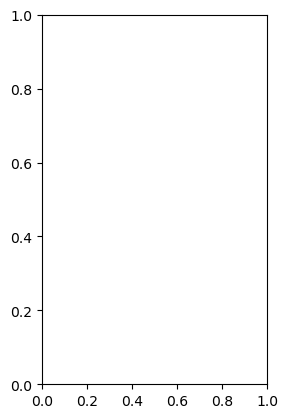

In [181]:
i = 0
plt.subplot(1, 2, i + 1)

# construct a kernel density estimate of the distribution
print(" - computing KDE in spherical coordinates")
kde = KernelDensity(
    bandwidth=0.04, metric="haversine", kernel="gaussian", algorithm="ball_tree"
)
kde.fit(Xtrain[ytrain == i])

# evaluate only on the land: -9999 indicates ocean
Z = np.full(land_mask.shape[0], -9999, dtype="int")
Z

In [194]:
#distinct_values = set(data.coverages[13][0])
distinct_values = set(kde.score_samples(xy))
list(distinct_values)
#list(distinct_values)


[-0.1814969790979717,
 1.0772318547078612,
 1.1115760660081833,
 1.522838908047106,
 1.4587151438977344,
 1.6004597905150604,
 2.892609630620541,
 2.795390176816568,
 1.2858768215141936,
 1.2372197470990614,
 1.6456990439742185,
 1.6727908961511275,
 -4.836703391681254,
 0.5724070096301554,
 -0.7763628421154456,
 -0.6556136024693435,
 -8.04115316500821,
 -6.268288727915488,
 -4.716570102155229,
 -2.180753830351305,
 -0.391078850578479,
 -0.43096564843682295,
 1.5654908033699844,
 1.5895308498017489,
 1.424557432362862,
 1.9054977672873878,
 1.4085648654087795,
 2.0181700459649523,
 2.4108672687359007,
 1.0037327178849313,
 -21.028757767868793,
 -20.30803399525814,
 -6.992972540710494,
 -17.459564552000867,
 -3.220228493489654,
 -1.9419857749193996,
 -62.645558593668504,
 -56.21809203387351,
 -4.161823848095647,
 -3.8160975779234114,
 -0.16322847383218786,
 -0.8944668547707089,
 1.4681998710960933,
 1.349880618051774,
 3.0103329299321366,
 -6.099587556954954,
 -1.4501304003931876,
 -39.

In [189]:
#distinct_values = set(data.coverages[13][0])
distinct_values = set(np.exp(kde.score_samples(xy)))
list(distinct_values)
#list(distinct_values)


[0.992038768485429,
 1.8470444686283827,
 1.5071172455163264,
 3.2466056946855133,
 4.574525393336899,
 5.865620788756132,
 6.575011689702023,
 7.393406607251109,
 7.823519104755292,
 7.625532276308263,
 7.507803406006815,
 9.449515890731618,
 9.306952315055014,
 9.196886500432583,
 10.243600357371065,
 10.453969802523488,
 10.62992428745838,
 11.073684786644094,
 13.335447758613668,
 14.988824287630337,
 16.38106779437942,
 17.217768562833157,
 17.63500150676532,
 18.88288619021455,
 18.040326815348863,
 20.623981398368983,
 20.934237367018,
 19.342604739048284,
 0.004899735903336486,
 20.15009372565993,
 1.2385273626989248,
 4.240520076867811e-11,
 0.03183675271418453,
 5.384754464413008e-36,
 1.524567396967098e-17,
 7.236999484042826,
 1.7133442952587242e-17,
 3.2640283954428726e-54,
 3.2726636189484624e-54,
 1.843053026073829e-17,
 2.04052715211457e-17,
 2.1170943560481822e-17,
 9.572929950205776e-36,
 9.939582109306868e-36,
 2.3229307919101423e-17,
 1.1336718112623409e-35,
 0.0654

In [186]:
np.exp(kde.score_samples(xy))

array([3.51741066e-06, 2.73071237e-06, 1.24892380e-06, ...,
       3.74575935e-54, 6.34476455e-54, 1.06800439e-53])

In [198]:
Z[land_mask] = np.exp(kde.score_samples(xy))
Z = Z.reshape(X.shape)
Z.shape


IndexError: boolean index did not match indexed array along dimension 0; dimension is 319 but corresponding boolean dimension is 77517

In [ ]:
Z[land_mask] = np.exp(kde.score_samples(xy))
Z = Z.reshape(X.shape)

# plot contours of the density
levels = np.linspace(0, Z.max(), 25)
plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)

In [150]:
#np.exp(kde.score_samples(xy))
#kde.score_samples(xy)
type(xy)

numpy.ndarray

[[-94.75 -94.5  -94.25 ... -34.75 -34.5  -34.25]
 [-94.75 -94.5  -94.25 ... -34.75 -34.5  -34.25]
 [-94.75 -94.5  -94.25 ... -34.75 -34.5  -34.25]
 ...
 [-94.75 -94.5  -94.25 ... -34.75 -34.5  -34.25]
 [-94.75 -94.5  -94.25 ... -34.75 -34.5  -34.25]
 [-94.75 -94.5  -94.25 ... -34.75 -34.5  -34.25]]
 - computing KDE in spherical coordinates
 - plot coastlines from coverage
 - computing KDE in spherical coordinates
 - plot coastlines from coverage


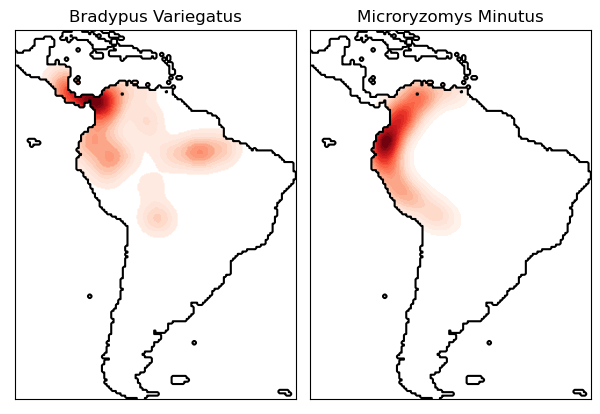

In [40]:
    if basemap:
        print(" - plot coastlines using basemap")
        m = Basemap(
            projection="cyl",
            llcrnrlat=Y.min(),
            urcrnrlat=Y.max(),
            llcrnrlon=X.min(),
            urcrnrlon=X.max(),
            resolution="c",
        )
        m.drawcoastlines()
        m.drawcountries()
    else:
        print(" - plot coastlines from coverage")
        plt.contour(
            X, Y, land_reference, levels=[-9998], colors="k", linestyles="solid"
        )
        plt.xticks([])
        plt.yticks([])

    plt.title(species_names[i])

plt.show()

In [151]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y
y

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [152]:
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [153]:
h

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81]])

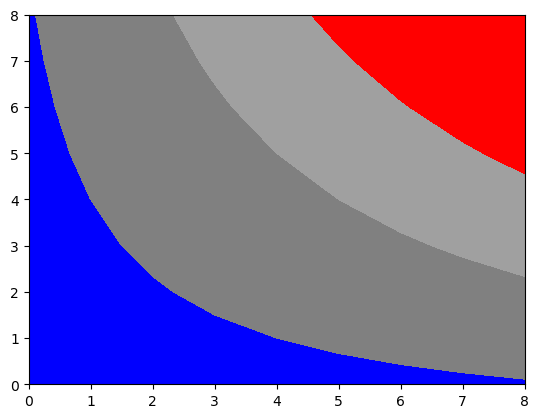

In [161]:

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')

cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()
